<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Мхитар! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>


<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
    
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

RANDOM_STATE = 12345

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Подготовка

In [24]:
try:
    df=pd.read_csv('taxi.csv', index_col = [0], parse_dates = [0])
except:
    df = pd.read_csv('/datasets/taxi.csv', index_col = [0], parse_dates = [0])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

In [25]:
df.index.is_monotonic

True

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [27]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [28]:
df = df.resample('1H').sum()
df.shape[0]

4416

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

**Вывод**:  Дата загружена в нужном формате. В исходном датасете 26496 записей, данные расположены в хронологическом порядке. Данные ресемплированы по часу, итого осталось 4416 записей.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Анализ

In [29]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [30]:
df1 = df.copy()

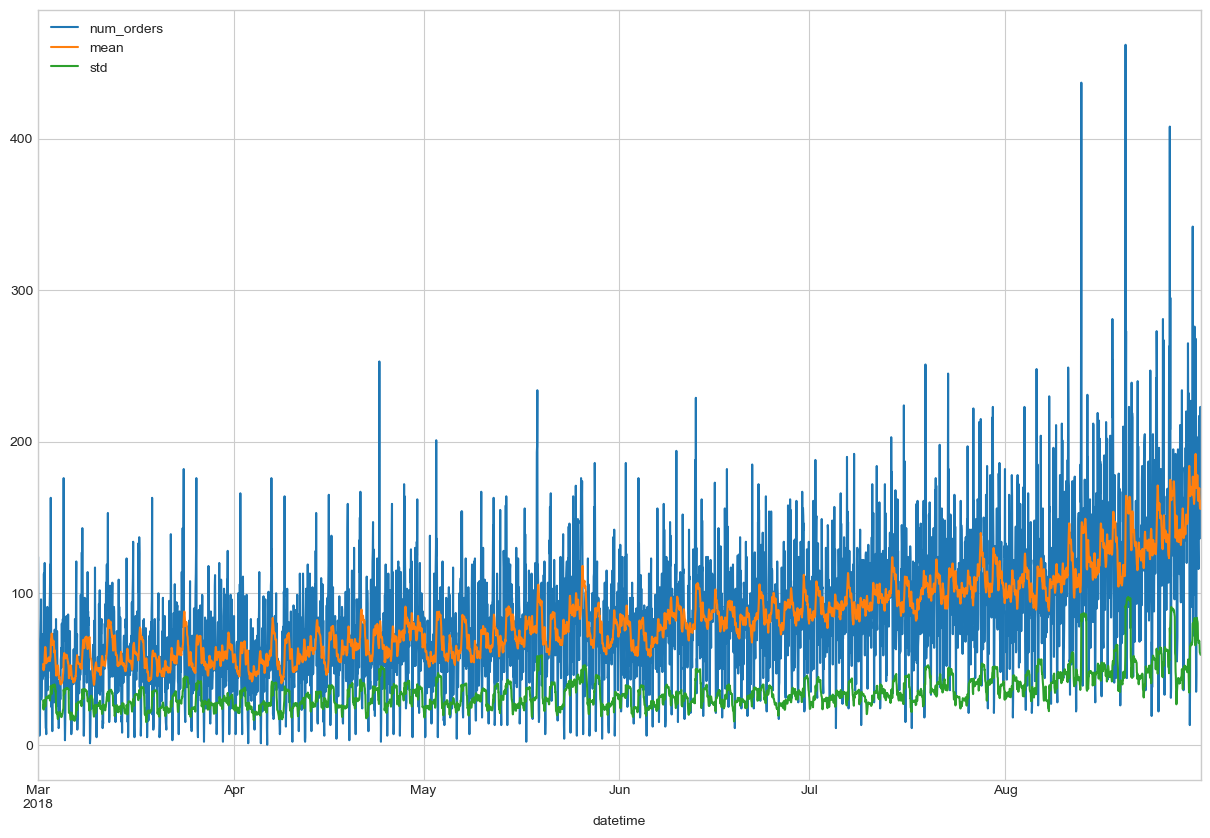

In [31]:
df1['mean'] = df1['num_orders'].rolling(20).mean()
df1['std'] = df1['num_orders'].rolling(20).std()
df1.plot(figsize = (15,10));

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Есть график временного ряда! </font>

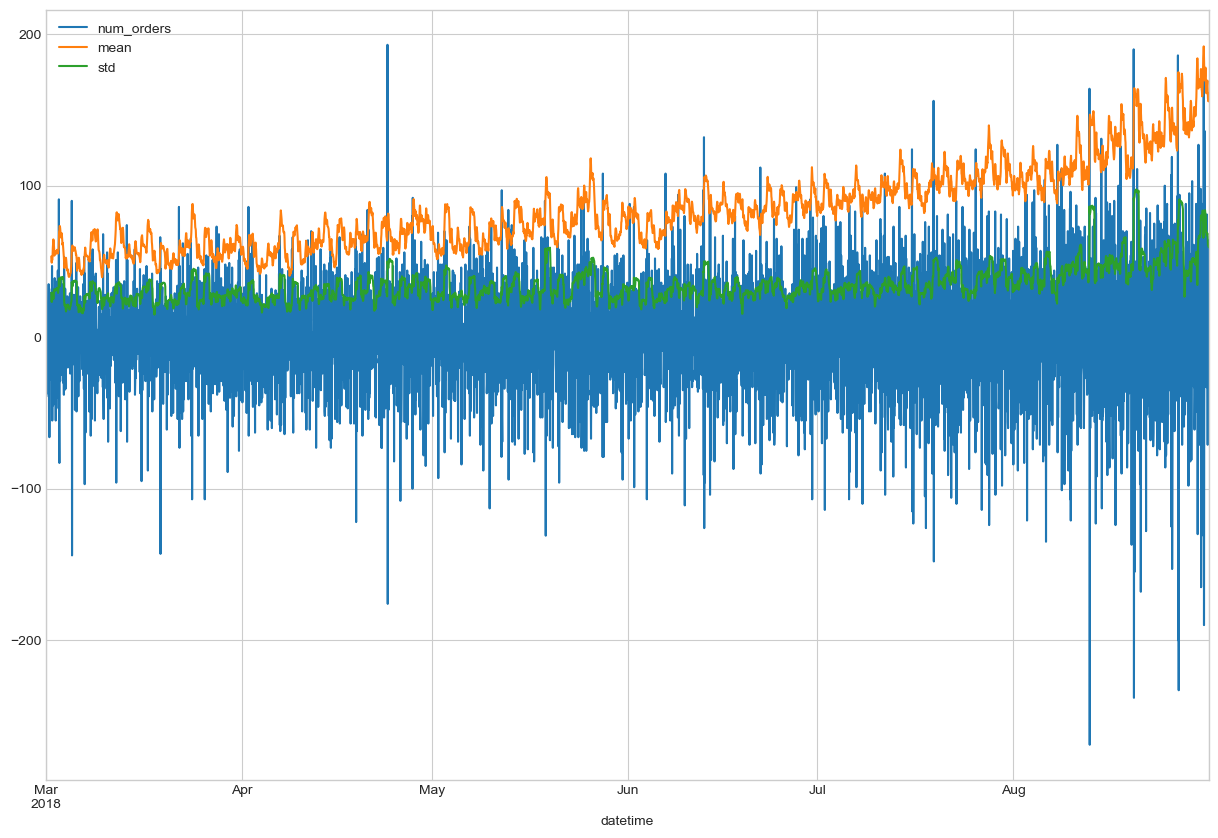

In [32]:
df1_shift = df1 - df1.shift()
df1_shift['mean'] = df1['num_orders'].rolling(20).mean()
df1_shift['std'] = df1['num_orders'].rolling(20).std()
df1_shift.plot(figsize = (15,10));

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Проверить ряд на стационарность можно тестом [Дикки-Фуллера](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html). </font>

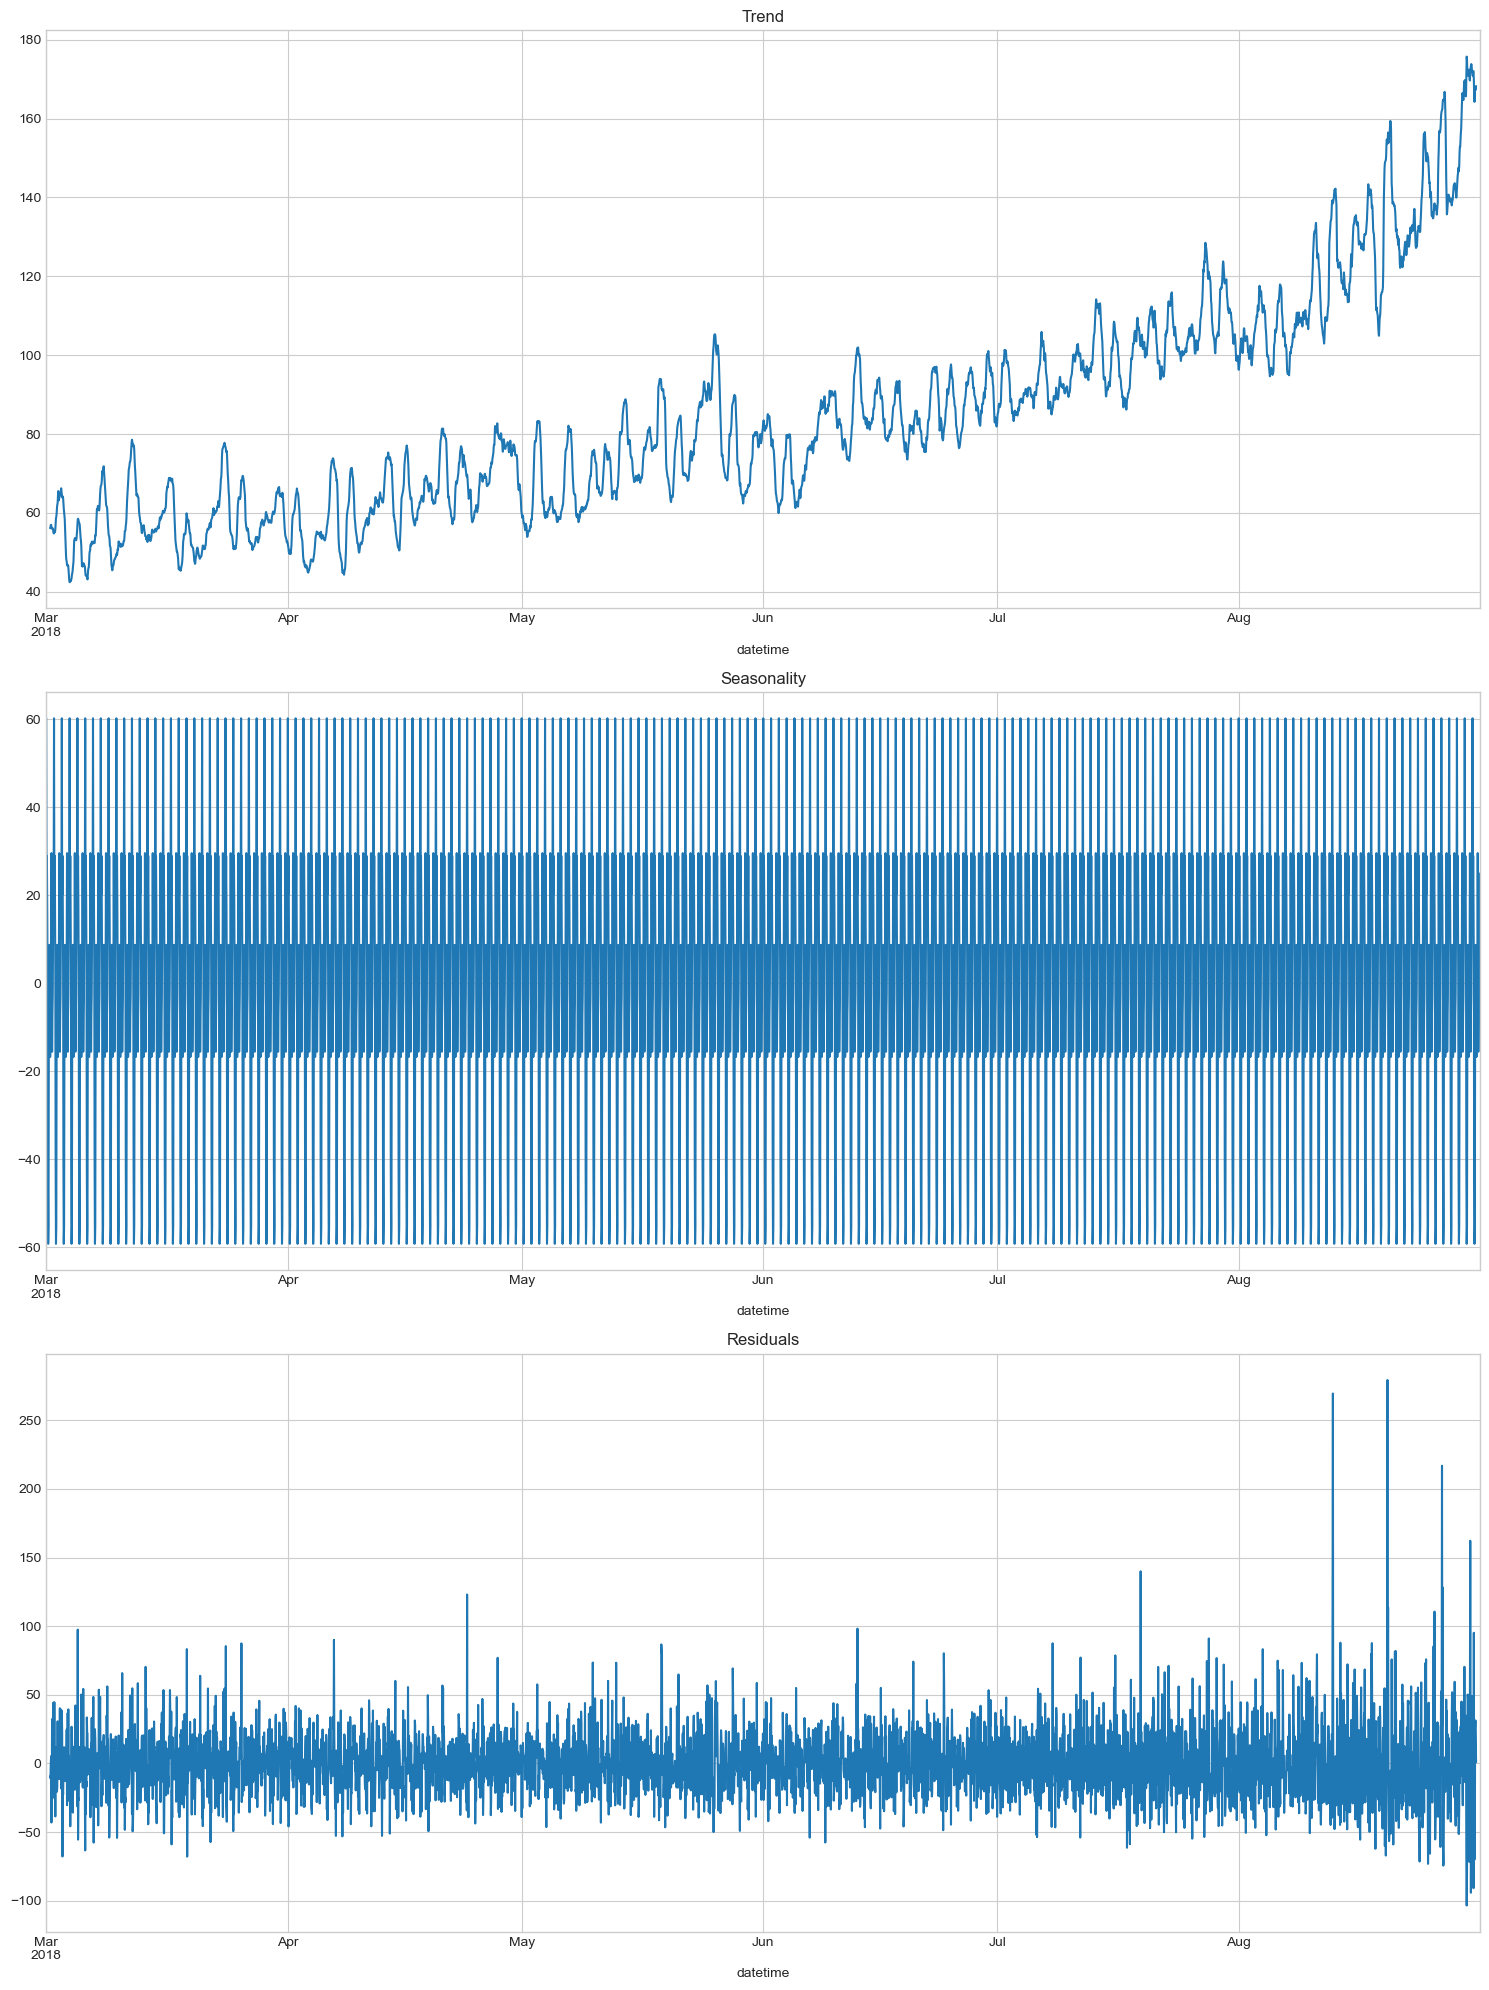

In [33]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(15,20))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

* Рассмотрим данные за последнюю неделю

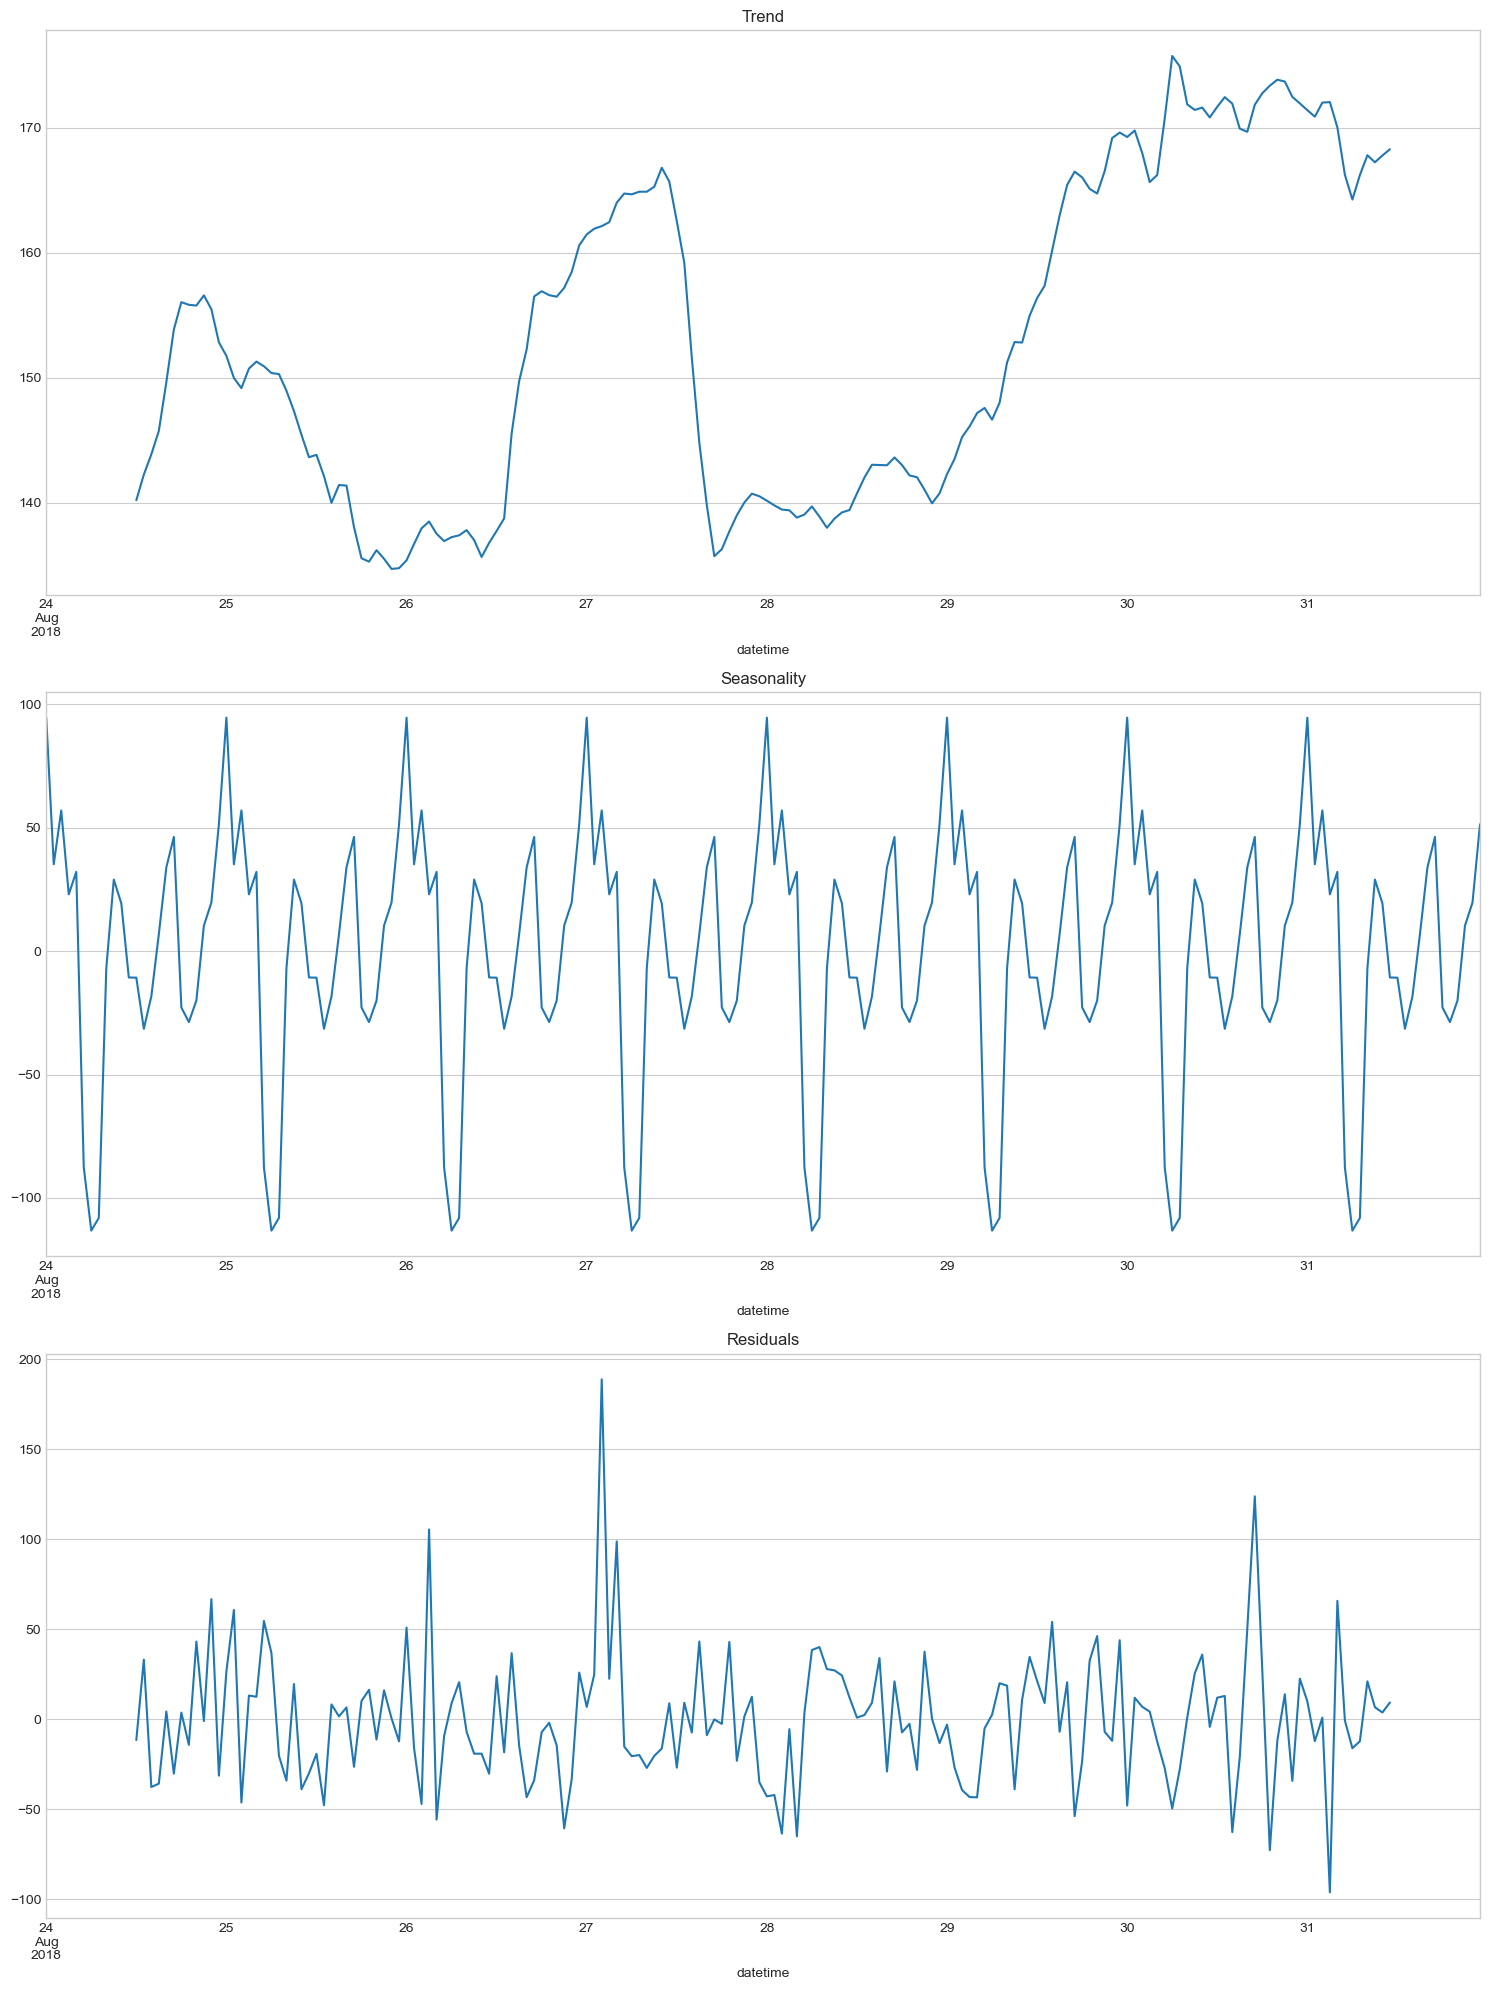

In [34]:
decomposed = seasonal_decompose(df['2018-08-24':'2018-08-31'])

plt.figure(figsize=(15,20))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

* Рассмотрим данные за последний месяц

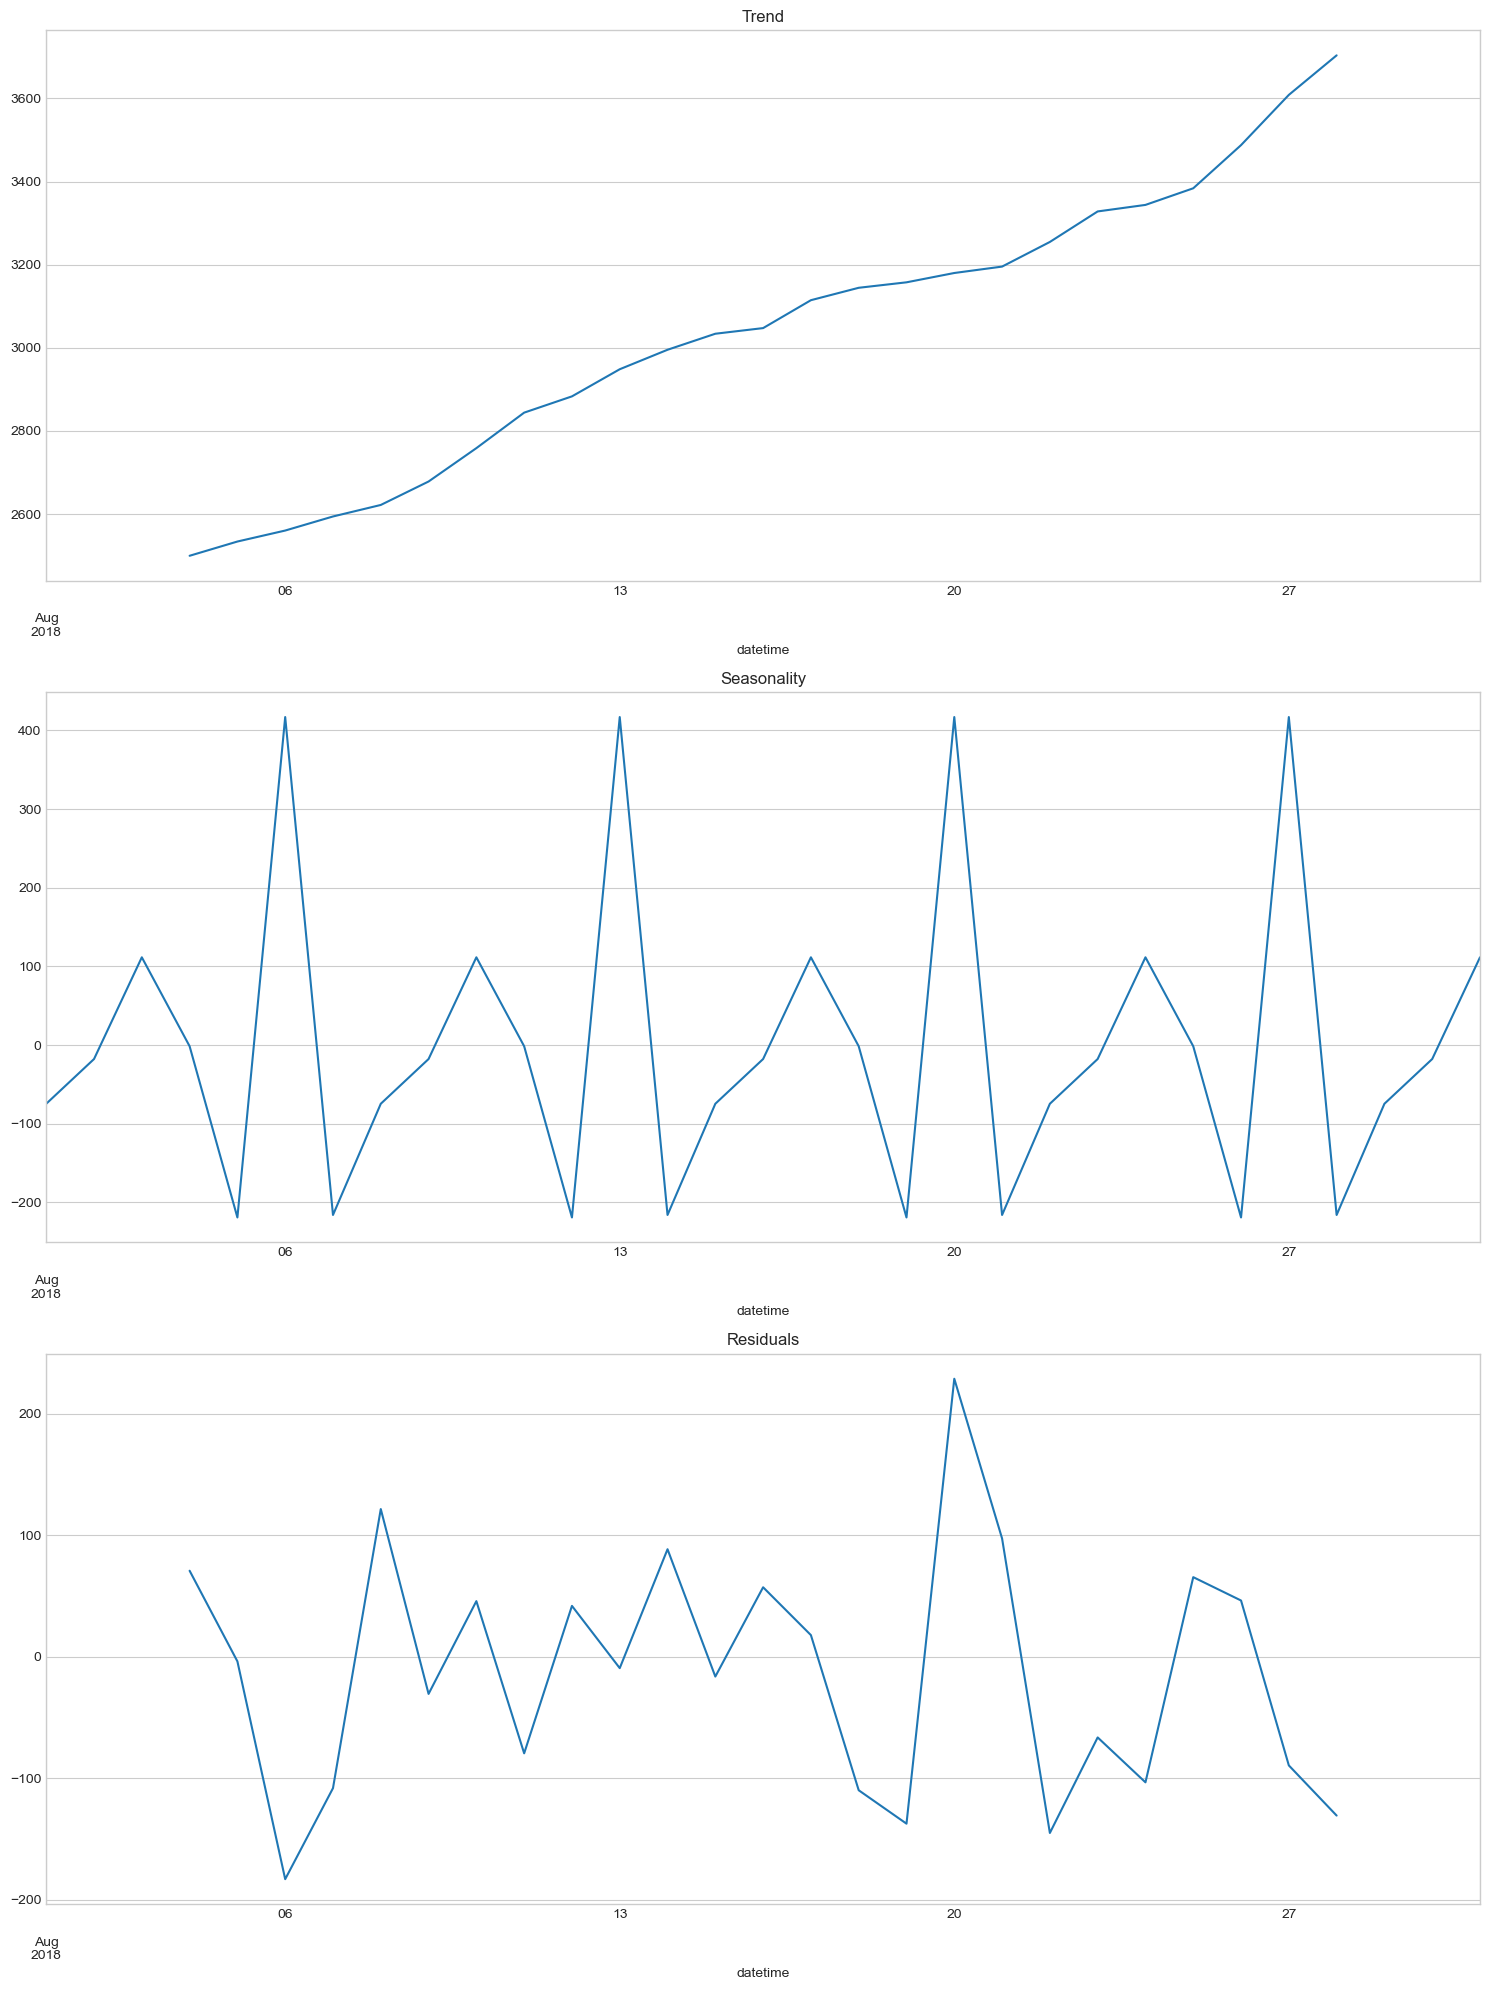

In [35]:
df_1 = df.resample('1D').sum()
df_1.shape[0]

decomposed = seasonal_decompose(df_1['2018-08-01':'2018-08-31'])

plt.figure(figsize=(15,20))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

**Вывод**: 
* Среднее значение и стандартное отклонение со временем увеличиваются, поэтому ряд нестационарный. Причем видно, что разность временного ряда более стационарна.
* Видна суточная сезонность: ночью количество заказов минимальна,а в вечернее время растет достигая пика, что вполне логично, т.к. вечером обычно наибольший спрос на такси. Так же видно, что в течении недели есть дни с наибольшим просом, и есть дни с меньшим. Можно предположить, что к концу недели спрос на такси возрастает.
* Заметен растущий тренд, т.е. количествово заказов растет.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что компоненты рассмотренны на различных временных интервалах.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал около месяца, то можно увидеть сезонность внутри недели.</font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Рассмотрел интервал в месяц, ресемплировав по дню, действительно, видна сезонность внутри недели: к концу недели растет кол-во заказов.
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

## Обучение

* Создадим новые признаки

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
def make_features(data, max_lag=24, rolling_mean_size=10):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return data

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Обрати внимание,  признак "день" вносит лишний шум в модель. У нас нет сезонности внутри месяца, будет просто последовательность чисел.<br></font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Убрал признак "день"
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

* Разделим на обучающую и тестовую выборки

In [38]:
def train_test(df):
    train, test = train_test_split(df, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)
    train = train.dropna()

    features_train = train.drop('num_orders', axis=1)
    features_test = test.drop('num_orders', axis=1)
    target_train = train['num_orders']
    target_test = test['num_orders']
    return features_train, features_test, target_train, target_test

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

In [39]:
tscv = TimeSeriesSplit(n_splits=5)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что применяешь TimeSeriesSplit для кроссвалидации временных рядов.</font>

### Linear Regression

In [40]:
dict1 = {}
for i  in range(2,26,2):
    for k in range(2,22,2):
        df1 = df.copy()
        df_new = make_features(df1, max_lag=i, rolling_mean_size=k)
        features_train, features_test, target_train, target_test = train_test(df_new)

        model_lr = Pipeline(steps =[
            ('nums', StandardScaler()),
            ('model', LinearRegression())])

        lr_rmse = cross_val_score(model_lr, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error').mean()*(-1)
        dict1[lr_rmse] = [i,k]

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Обрати внимание, категории ("день","день недели","час") тоже стандартизирутся.  Категориальные данные должны быть дискретной величиной (int). Для линейной модели их лучше перекодировать в OHE.</font>

In [41]:
lr_rmse = min(dict1.keys())
print(f'max_lag наилучшей модели: {dict1[min(dict1.keys())][0]}\
        \nrolling_mean_size наилучшей модели: {dict1[min(dict1.keys())][1]}')

max_lag наилучшей модели: 24        
rolling_mean_size наилучшей модели: 18


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Классно, что подбираешь признаки.</font>

### Random Forest

In [42]:
df1 = df.copy()
df_new = make_features(df1, max_lag=24, rolling_mean_size=18)
features_train, features_test, target_train, target_test = train_test(df_new)

In [43]:
model_rf = Pipeline(steps =[
    ('nums', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=RANDOM_STATE)),
])

parameters = {'rf__n_estimators': [1,2,4,8,16,32,64,128],
              'rf__max_depth': range(2,22, 2)}
rf_grid = RandomizedSearchCV(model_rf, parameters, scoring='neg_root_mean_squared_error', cv=tscv).fit(features_train, target_train)
rf_rmse = -1 * rf_grid.best_score_
rf_best = rf_grid.best_estimator_

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

### CatBoost

In [44]:
model_cb = CatBoostRegressor(random_state=RANDOM_STATE, verbose=False)

parameters = {'depth': [2,4],
              'learning_rate': [0.2, 0.3]}

cb_grid = RandomizedSearchCV(model_cb, parameters, scoring='neg_root_mean_squared_error', cv=tscv).fit(features_train, target_train)
cb_rmse = -1 * cb_grid.best_score_
cb_best = cb_grid.best_estimator_

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

### LightGBM

In [45]:
model_lgbm = LGBMRegressor(random_state=RANDOM_STATE)

parameters = {'max_depth': range(2, 10, 2),
              'n_estimators': range(2,200,10)}

lgbm_grid = RandomizedSearchCV(model_lgbm, parameters, scoring='neg_root_mean_squared_error', cv=tscv).fit(features_train, target_train)
lgbm_rmse = -1 * lgbm_grid.best_score_
lgbm_best = lgbm_grid.best_estimator_

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Анализ моделей

In [46]:
result = {}
for i, k in zip(['Linear Regression', 'Random Forest','CatBoost', 'LightGBM'], ['lr', 'rf', 'cb', 'lgbm']):
    result[i] = [vars()[k + '_rmse']]

result_table = pd.DataFrame(result.values(), index = result.keys(), columns = ['RMSE']  )
result_table.style.highlight_min(subset = ['RMSE'], color = 'lightgreen', axis = 0)

,RMSE
Linear Regression,27.132726
Random Forest,25.342183
CatBoost,24.956353
LightGBM,24.750665


**Вывод**: Провел анализ моделей, определил, что наиболее оптимальной является LightGBM.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

## Тестирование

In [47]:
pred_best = lgbm_best.predict(features_test)
rmse_best = mean_squared_error(target_test, pred_best, squared=False)
print(f'RMSE лучшей модели на тестовой выборке: {rmse_best:.2f}')

RMSE лучшей модели на тестовой выборке: 40.55


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

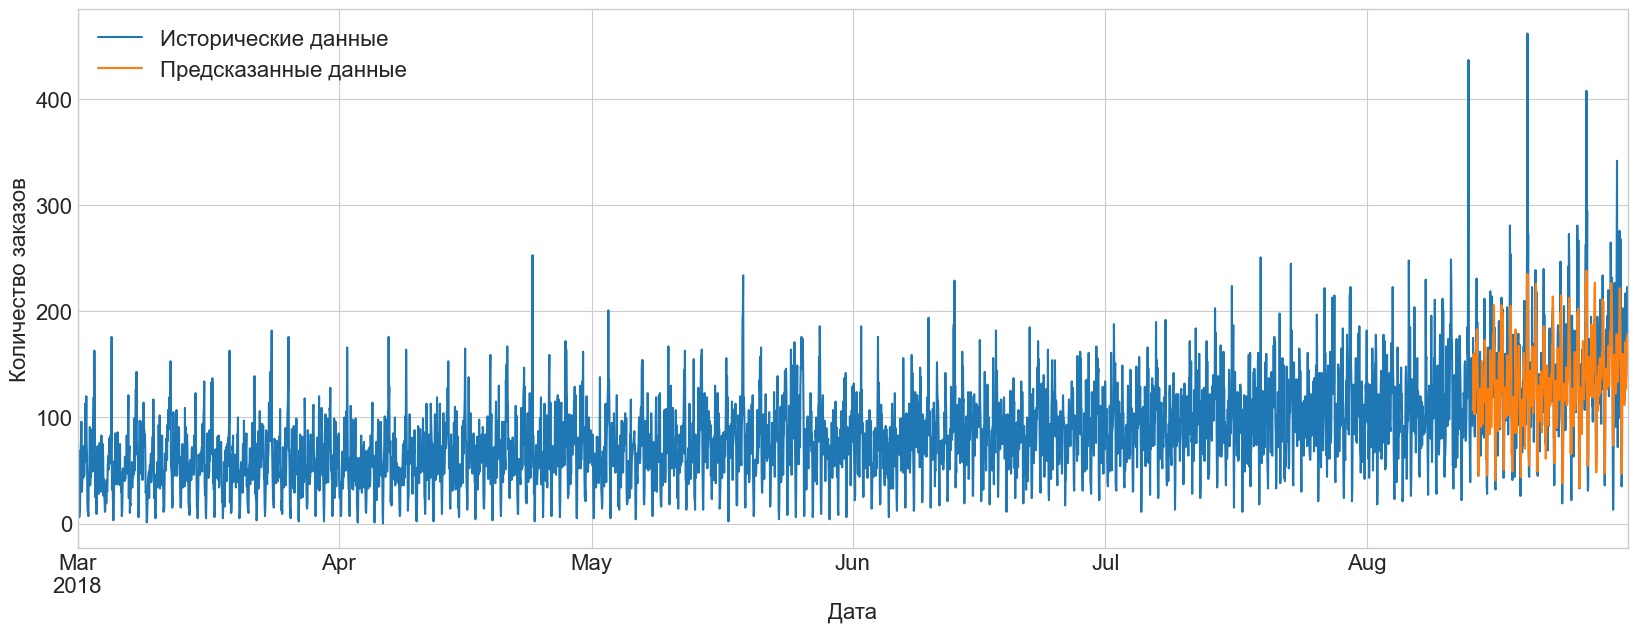

In [48]:
dff = pd.DataFrame(pred_best.tolist(), index=target_test.index, columns = ['predicted'])

plt.rcParams['font.size'] = '16'
df['num_orders'].plot(figsize=(20,7), label = 'Исторические данные')
dff['predicted'].plot(figsize=(20,7), label = 'Предсказанные данные');
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend();

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что выводишь графики прогноза и реальных данных! Это один из важнейших инструментов анализа результатов моделирования временных рядов, чтобы увидеть где основные не "попадалки" модели.\
Лучше выбрать масштаб, скажем, несколько дней, чтобы увидеть можо было и сравнить каждый час.</font>

## Вывод

1. Была произведена загрузка данных и их подготовка (ресемплирование по 1 часу)
2. При анализ данных был обнаружен тренд на общее увеличение заказов такси.Более того, на графиках видна суточная сезонность:: ночью количество заказов минимальна,а в вечернее время растет достигая пика.
3. Были добавлены новые признаки:день недели, часб день, отстающие значения и скользящее среднее. На дополнном датасете подобраны оптимальные гиперпараметры для моделей.
4. Были обучены 4 модели, на которых были подобраны оптимальные гиперпараметры. Наилучшая метрика RMSE у модели LightGBM: 24.75.
5. Данная модель была протестирована на тестовой выборке и дала результат меньше 48.

<font color='blue'><b>Итоговый комментарий ревьюера </b></font> \
<font color='green'>Мхитар, хороший проект получился! Большое спасибо за проделанную работу. Видно, что приложено много усилий. Полностью описан ход решения, даны все необходимые пояснения, выводы полные и логичные.

<font color='green'><b>Работа уже может быть зачтена</b>, отправляю обратно, чтобы была возможность задать вопросы если они есть  ))).</font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо за ревью. Вопросов как таковых на данный момент нет.
</div>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Мхитар, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb \
Или [Предсказываем будущее с помощью библиотеки Facebook Prophet](https://habr.com/ru/company/ods/blog/323730/)
</font> 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48